<h1>인공지능개론 2주차 과제(데이터 전처리)</h1>

<h5> 라이브러리 호출</h5>

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

<h5>local data load</h5>

In [6]:
file_path = "C:\\data\\titanic.csv"
df = pd.read_csv(file_path)

<h5>결측치 시각화를 통한 확인</h5>


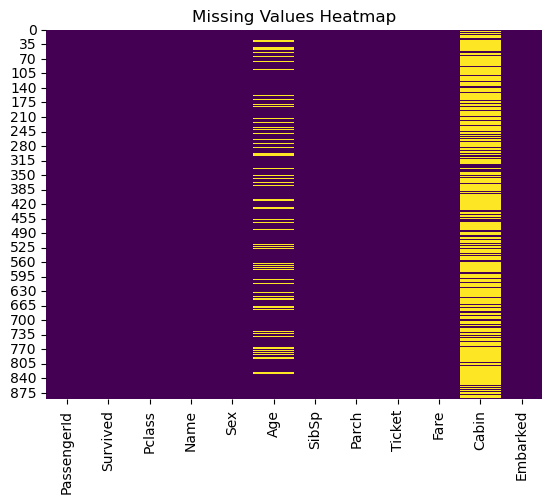

In [7]:
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()


<h5> [Age] Column 결측치 평균값으로 대체 및 재 시각화</h5>


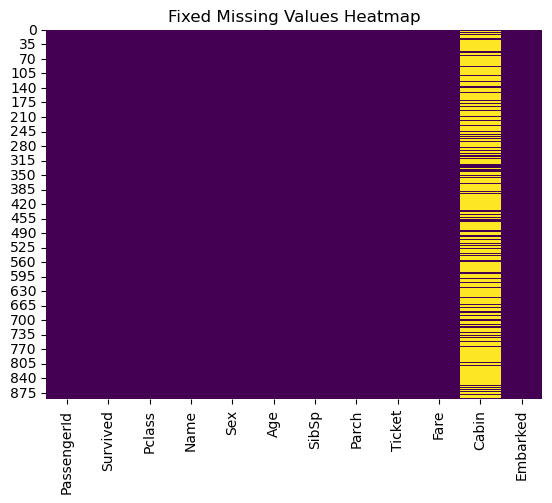

In [8]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Fixed Missing Values Heatmap")
plt.show()

<h5>남은 결측치 값 제거</h5>

In [9]:
df=df.dropna(axis=1)

<h5> Imbalanced Data 확인 및 삭제</h5>

In [10]:
imbalanced_data=[] # 불균형 데이터를 저장할 리스트
for column in df.columns:
    value_counts = df[column].value_counts()
    max_count = value_counts.max()
    min_count = value_counts.min()
    imbalance_ratio = max_count / min_count  # 불균형 비율
    print(f"열 이름: {column}")
    print(f"가장 많은 값: {max_count}, 가장 적은 값: {min_count}")
    print(f"불균형 비율: {imbalance_ratio:.2f}\n\n")
    if imbalance_ratio > 5: # 불균형 기준 값은 5롤 임의로 설정
        imbalanced_data.append(column)

열 이름: PassengerId
가장 많은 값: 1, 가장 적은 값: 1
불균형 비율: 1.00


열 이름: Survived
가장 많은 값: 549, 가장 적은 값: 342
불균형 비율: 1.61


열 이름: Pclass
가장 많은 값: 491, 가장 적은 값: 184
불균형 비율: 2.67


열 이름: Name
가장 많은 값: 1, 가장 적은 값: 1
불균형 비율: 1.00


열 이름: Sex
가장 많은 값: 577, 가장 적은 값: 314
불균형 비율: 1.84


열 이름: Age
가장 많은 값: 177, 가장 적은 값: 1
불균형 비율: 177.00


열 이름: SibSp
가장 많은 값: 608, 가장 적은 값: 5
불균형 비율: 121.60


열 이름: Parch
가장 많은 값: 678, 가장 적은 값: 1
불균형 비율: 678.00


열 이름: Ticket
가장 많은 값: 7, 가장 적은 값: 1
불균형 비율: 7.00


열 이름: Fare
가장 많은 값: 43, 가장 적은 값: 1
불균형 비율: 43.00




<h5> Imbalanced data   / 불필요 데이터 확인및  삭제리스트 수정</h5>

In [11]:
print(df.columns)
print(imbalanced_data)    
imbalanced_data.remove('Age') #이것 결측값을 대체했기 때문에 불균형이 생겼으므로 다시 삭제 + 불필요 칼럼 제거
imbalanced_data.append('PassengerId')
imbalanced_data.append('Name')



Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare'],
      dtype='object')
['Age', 'SibSp', 'Parch', 'Ticket', 'Fare']


<h5>Imbalanced Data(Column) 삭제</h5>

In [12]:
df = df.drop(columns=imbalanced_data)
print(df.columns) 

Index(['Survived', 'Pclass', 'Sex', 'Age'], dtype='object')


<h5> Encoding; 인코딩할 데이터는 위의 df.head()에서 성별밖에 없다는 것을 확인</h5>

In [13]:

#인코딩 전 데이터 개수 
print(df['Sex'].value_counts())

#인코딩 객체 생성및 인코딩
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
print(df['Sex'])

#인코딩 후 데이터 개수 
print(df['Sex'].value_counts())
#Note 인코딩할 데이터는 위의 df.head()에서 성별밖에 없다는 것을 확인

#인코딩 전 데이터 개수 
print(df['Sex'].value_counts())

#인코딩 객체 생성및 인코딩
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
print(df['Sex'])

#인코딩 후 데이터 개수 
print(df['Sex'].value_counts())


Sex
male      577
female    314
Name: count, dtype: int64
0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int32
Sex
1    577
0    314
Name: count, dtype: int64
Sex
1    577
0    314
Name: count, dtype: int64
0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64
Sex
1    577
0    314
Name: count, dtype: int64


<h5> 학습 타겟 설정 및 데이터 분리</h5>

In [14]:
X = df.drop("Survived", axis=1)  
y = df["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h5> Decision Tree

In [15]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
print("==================== Decision Tree ========================")
print(f"Accuracy: {accuracy_score(y_test, dt_pred):.2f}")
print(classification_report(y_test, dt_pred),"\n\n")

==================== Decision Tree ========================
Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       105
           1       0.76      0.68      0.71        74

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.78      0.78      0.77       179
 




<h5>RainForest</h5>

In [16]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
print("==================== Random Forest ========================")
print(f"Accuracy: {accuracy_score(y_test, rf_pred):.2f}")
print(classification_report(y_test, rf_pred),"\n\n")

==================== Random Forest ========================
Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       105
           1       0.78      0.70      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179
 




<h5>SVM</h5>

In [17]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
print("================ Support Vector Machine ====================")
print(f"Accuracy: {accuracy_score(y_test, svm_pred):.2f}")
print(classification_report(y_test, svm_pred),"\n\n")

================ Support Vector Machine ====================
Accuracy: 0.61
              precision    recall  f1-score   support

           0       0.60      0.99      0.75       105
           1       0.83      0.07      0.12        74

    accuracy                           0.61       179
   macro avg       0.72      0.53      0.44       179
weighted avg       0.70      0.61      0.49       179
 




<h5>LogisticRegression</h5>

In [18]:
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)
print("================= Logistic Regression ====================")
print(f"Accuracy: {accuracy_score(y_test, lr_pred):.2f}")
print(classification_report(y_test, lr_pred))

================= Logistic Regression ====================
Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



<h5> KNeighborsClassifier</h5>

In [19]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
accuracy = accuracy_score(y_test,knn_pred)
print("================= K-Nearest Neighbors ====================")
print(f"Accuracy: {accuracy_score(y_test, knn_pred):.2f}")
print(classification_report(y_test, knn_pred))

================= K-Nearest Neighbors ====================
Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       105
           1       0.77      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

